In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# Date: February 2025
# License: MIT

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Integrals

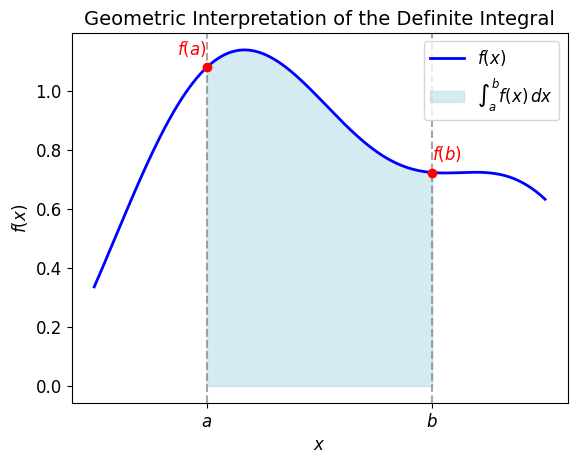

In [3]:
# Define a general function
def f(x):
    return np.exp(-0.5 * (x - 2)**2) + 0.3 * np.sin(2 * x) + 0.2

# Define the range of x values
x = np.linspace(0, 4, 200)
y = f(x)

# Define integration limits
a, b = 1, 3

fig, ax = plt.subplots()

# Plot the function
ax.plot(x, y, label=r'$f(x)$', color='blue', linewidth=2)

# Fill the area under the curve between x=a and x=b
x_fill = np.linspace(a, b, 100)
y_fill = f(x_fill)
ax.fill_between(x_fill, y_fill, color='lightblue', alpha=0.5, label=r'$\int_a^b f(x) \,dx$')

# Mark points a and b on the x-axis
ax.scatter([a, b], [f(a), f(b)], color='red', zorder=3)
ax.axvline(a, color='gray', linestyle='dashed', alpha=0.7)
ax.axvline(b, color='gray', linestyle='dashed', alpha=0.7)

ax.set_xlabel(r'$x$', fontsize=12)
ax.set_ylabel(r'$f(x)$', fontsize=12)
ax.set_title(r'Geometric Interpretation of the Definite Integral', fontsize=14)

ax.set_xticks([a, b])
ax.set_xticklabels([r'$a$', r'$b$'], fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12)

# Add labels for f(a) and f(b)
ax.text(a, f(a) + 0.03, r'$f(a)$', fontsize=12, verticalalignment='bottom', horizontalalignment='right', color='red')
ax.text(b, f(b) + 0.03, r'$f(b)$', fontsize=12, verticalalignment='bottom', horizontalalignment='left', color='red')

ax.legend(loc='upper right', fontsize=12)
plt.savefig('figures/integral.pdf')

Double Integrals

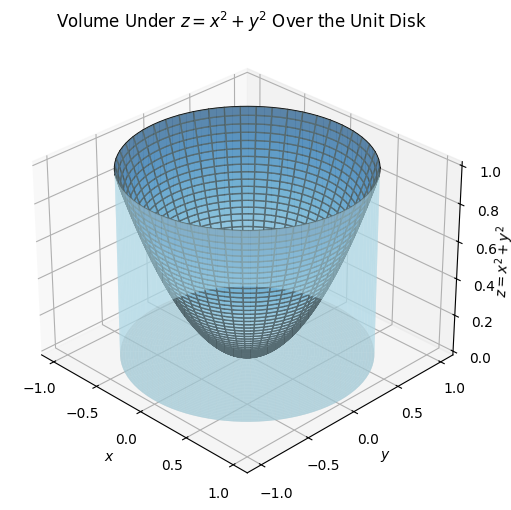

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Define the function f(x, y) = x^2 + y^2 over the unit disk in polar coords
r = np.linspace(0, 1, 50)
theta = np.linspace(0, 2*np.pi, 100)
R, Theta = np.meshgrid(r, theta)

# Convert polar (R, Theta) to Cartesian (X, Y)
X = R * np.cos(Theta)
Y = R * np.sin(Theta)
Z = X**2 + Y**2  # f(x, y) = x^2 + y^2

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

# 1. Plot the surface for z = x^2 + y^2
ax.plot_surface(X, Y, Z, cmap="Blues", edgecolor='k')

# 2. Plot the flat "floor" at z=0 over the same (X,Y) mesh
ax.plot_surface(X, Y, np.zeros_like(Z), color='lightblue', alpha=0.5, edgecolor='none')

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z = x^2 + y^2$", labelpad=-2)
ax.set_title("Volume Under $z = x^2 + y^2$ Over the Unit Disk")

# Adjust viewpoint
ax.view_init(elev=30, azim=-45)

# Boundary param (full circle at r=1)
phi = np.linspace(0, 2*np.pi, 100)
Xb = np.cos(phi)
Yb = np.sin(phi)
Zb = Xb**2 + Yb**2  # = 1 for these boundary points

# Build polygons (vertical "strips") connecting z=0 to z=Zb
verts = []
for i in range(len(phi) - 1):
    quad = [
        (Xb[i],   Yb[i],   0),
        (Xb[i],   Yb[i],   Zb[i]),
        (Xb[i+1], Yb[i+1], Zb[i+1]),
        (Xb[i+1], Yb[i+1], 0)
    ]
    verts.append(quad)

side_poly = Poly3DCollection(verts, alpha=0.5, facecolors='lightblue')
ax.add_collection3d(side_poly)

ax.set_xticks(np.arange(-1, 1.1, 0.5))
ax.set_yticks(np.arange(-1, 1.1, 0.5))

plt.savefig('figures/double_integral.pdf', bbox_inches='tight')